In [16]:
import numpy as np              
import os    
import csv                  
import pandas as pd             
import matplotlib               
import matplotlib.pyplot as plt 
import scipy.stats as stats
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import datasets, linear_model

pptdata = os.path.join('C:Downloads/lab2/', 'BodyBrain.csv');
data = pd.read_csv(pptdata);


In [42]:
X = data['# log10 body weight (kg)'].values.reshape(-1, 1)
Y = data[' log10 brain weight (g)'].values

def bootstrap_resample(X, n=None):
    if n == None:
        n = len(X)
    resample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
    X_resample = X[resample_i]
    return X_resample

In [52]:
X_resampled = np.zeros((5000,62,62))
bs = np.zeros((5000,62))
i=0
while i < 5000:
    X_resampled[i,:] = bootstrap_resample(X)
    X_resample = bootstrap_resample(X)
    regr = linear_model.LinearRegression()
    regr.fit(X_resample, Y)
    bs[i,:] = regr.predict(X)
    i = i +1 

print ('original mean:', round(X.mean(),3))
print ('resampled mean:', round(X_resampled.mean(),3))

original mean: 0.581
resampled mean: 0.583


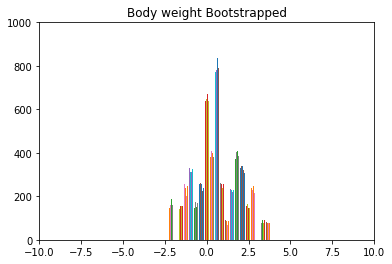

In [53]:
plt.hist(X_resampled[:,:,0], bins=20) 
plt.title("Body weight Bootstrapped")
plt.axis([-10,10,0,1000])
plt.show()

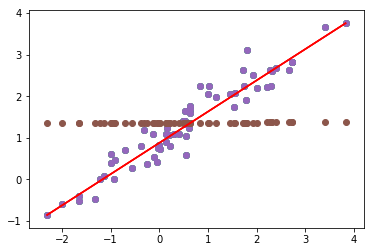

In [66]:
plt.scatter(X,Y)
reg = linear_model.LinearRegression()
fit = reg.fit(X,Y)
pred = 
plt.plot([X.min(), X.max()], [Y.min(), Y.max()], c='r')
plt.scatter(X,np.mean(bs,axis=0))
plt.show()

(62, 1)

In [61]:
np.mean(np.transpose(bs),axis=1).shape

(62,)

In [215]:
X_resample[2]

0.13033

In [220]:
np.floor(np.random.rand(len(X))*len(X)).astype(int).shape

(62,)

In [20]:
X_resample.shape

(62,)